# 1. Age Estimator

Building and evaluating a model for age estimation based on the “facial age” dataset on Kaggle:
https://www.kaggle.com/datasets/frabbisw/facial-ageDataset

This dataset contains 9,778 .png files.

There are 99 folders where the name of each folder represents age of the faces inside the folder.

An image dataset consisting human faces with ages.



### 1.1 Prepare the dataset for suitable processing and save for reuse

(a) Manually download and unzip the file face_age.zip into a local folder dataset\face_age.

(b) Read the dataset into the notebook by scanning all age-labeled subfolders and loading the image file paths.

(c) Verify the dataset by checking that all 99 age folders are present and counting the total number of images.

In [ ]:
# (a) + (b) + (c) Download, read and verify the dataset
# ---------------------------------------------------------------------

# a) Manually download and unzip the file face_age.zip into a local folder dataset\face_age.
# ---------------------------------------------------------------------
# Done without code.
# ---------------------------------------------------------------------

# ---------------------------------------------------------------------
# (b) Read the dataset into the notebook by scanning all age-labeled subfolders and loading the image file paths.
# ---------------------------------------------------------------------
from pathlib import Path

# Define dataset root folder
root = Path("dataset/face_age")  # dataset subfolder inside the root path folder where this scrpt is located

# Define image file extensions to consider 
    # globals() checks for an existing variable in the global scope; global scope is used here to allow overriding the default image extensions if needed
    # if `image_exts` is already defined globally, it will be used; otherwise, a default set of common image file extensions is provided. 
_image_exts = globals().get("image_exts", {".tiff", ".jpeg", ".bmp", ".png", ".jpg", ".tif"}) # use existing `image_exts` set if present, otherwise default to common image formats

# Find all subfolders and keep only numeric-named ones. Numeric folders correspond to ages
#found_age_dirs = sorted( # sort age folders numerically
#    [p for p in root.iterdir() if p.is_dir() and p.name.isdigit()], # filter to only numeric-named folders
#    key=lambda p: int(p.name) # sort by numeric age value
#)

# Find all subfolders and keep only numeric-named ones. Numeric folders correspond to ages 
def folder_age_key(p: Path): # helper function to extract age as integer from folder name
    """Return the folder name as an integer age for sorting.""" # docstring (explanation of function purpose, not executed)
    return int(p.name) # convert folder name to integer for sorting

found_age_dirs = []  # create an empty list to store valid age folders

for p in root.iterdir():  # go through every item in the dataset root folder (files and folders)
    if p.is_dir():  # check if the item is a directory (folder, not a file)
        if p.name.isdigit():  # check if the folder name is made only of digits
            found_age_dirs.append(p)  # add it to the list of age folders

    # Sort the found age directories numerically by their folder names using the helper function (folder_age_key)
found_age_dirs.sort(key=folder_age_key)

# ---------------------------------------------------------------------
# (c) Verify the dataset by checking that all 99 age folders are present and counting the total number of images.
# ---------------------------------------------------------------------

# 1. Extract numeric ages (as integers)
    # Create a list of numeric ages from the folder names
found_numeric_ages = []  # create an empty list to store numeric ages
for p in found_age_dirs:  # go through each age folder 
    age_number = int(p.name)  # convert folder name to integer  /  .name gets the folder name as a string
    found_numeric_ages.append(age_number)  # add to the list of numeric ages

# 2. Collect image file paths from the numeric age folders 
found_images = []  # create an empty list to store image file paths

for d in found_age_dirs:  # iterate over each age directory
    for fp in d.iterdir():  # iterate over items inside the directory
        if fp.is_file():  # make sure the item is a file
            if fp.suffix.lower() in _image_exts:  # check that it’s an image file
                found_images.append(str(fp))  # convert Path to string and add to the list

# 3. Verify which ages are missing
expected_ages = set(range(0, 111)) # expected ages 0..110
missing_ages = sorted(expected_ages - set(found_numeric_ages)) # dataset covers ages 0 to 110, but some folders may be missing

# -----------------------------------------------------------------------------------------

# Summary output
print(f"Found numeric age folders: {len(found_age_dirs)}") # total numeric age folders found
print("Numeric ages found (sorted):", found_numeric_ages) # list of numeric ages found
print("Missing ages (from 0..110):", missing_ages) # list of missing ages
print(f"Total image files found: {len(found_images)}") # total image files found

In [ ]:
#found_images[:5]  # display first 5 image file paths found
#found_age_dirs[:5]  # display first 5 age directories found

(d) Assign numeric age labels to each image (for predicting exact age).

(e) Assign age category labels to each image (for classification tasks).

(f) Save the dataset for reuse in training, validation and testing.

In [ ]:
#(d) Assign numeric age labels to each image (for predicting exact age). + (e) Assign age category labels to each image (for classification tasks). + (f) Save the dataset 
# for reuse in training, validation and testing.
# ---------------------------------------------------------------------

import pandas as pd  # pandas not previously imported in the notebook cells shown

# Lists to collect the results for each image
image_paths = [] # to store image file paths as strings
numeric_ages = [] # to store numeric age labels (as integers)
age_categories = [] # to store age category labels (as strings)

# Helper function to map numeric age to category
def age_to_category(age): # map numeric age to age category string
    """Convert numeric age to age category string."""  # docstring explaining function purpose
    # Use simple if/elif ranges for clarity 
    # Categories: child (0-12), teen (13-19), youth (20-30), mid (31-45), mature (46-60), older (61+)
    # age is expected to be a non-negative integer. File path contains only valid ages.
    if age >= 0 and age <= 12:
        return "child"
    elif age >= 13 and age <= 19:
        return "teen"
    elif age >= 20 and age <= 30:
        return "youth"
    elif age >= 31 and age <= 45:
        return "mid"
    elif age >= 46 and age <= 60:
        return "mature"
    else:
        return "older"

# Iterate over each image path collected earlier in `found_images`
for img_path in found_images:
    # found_images contains string paths (e.g. 'dataset\\face_age\\001\\1000.png'); convert to Path object for easier manipulation
    p = Path(img_path) # convert to Path to work with parent folder name (e.g. dataset\face_age\001\1000.png (as Path object))

    # Extract the parent folder name which encodes the age (may be zero-padded like "001")
    folder_name = p.parent.name # p.parent gets the parent folder (e.g. dataset\face_age\001), .name gets the folder name as string (e.g. "001")

    # Attempt to convert the folder name to an integer age
    try:
        age_val = int(folder_name) # convert folder name to integer age (e.g. "001" -> 1)
    except ValueError:
        # If conversion fails, skip this file (folder not numeric)
        # You could log or collect these if needed
        skipped_file = img_path  # store the skipped file path if needed
        continue

    # Compute category for this age
    category = age_to_category(age_val) # help function defined above

    # Append results to lists
    image_paths.append(str(p)) # note: img_path is already a string, but converting p back to string for consistency
    numeric_ages.append(age_val) # as stored integer
    age_categories.append(category) # as computed string category

print(f"Images skipped due to non-numeric folders: {skipped_file if 'skipped_file' in locals() else 'None'}" ) # print the last skipped file if any

# Build a DataFrame and save to CSV for reuse
# each row corresponds to one image with its labels
df_labels = pd.DataFrame({
    "image_path": image_paths, # column with image file paths
    "age": numeric_ages, # column with numeric age labels
    "age_category": age_categories # column with age category labels
}) 

# Write CSV to notebook working directory
    # Path() without arguments gives the current working directory 
output_csv = Path("dataset_labels.csv") # output CSV file path in the current working directory 
df_labels.to_csv(output_csv, index=False) # save DataFrame to CSV without row index, using the defined output path

# Print a short summary
print(f"Saved {len(df_labels)} labeled rows to '{output_csv}'") # print number of rows saved and output file path
print("Counts per category:") # print counts of each age category
print(df_labels["age_category"].value_counts()) # value_counts() counts occurrences of each unique value in the specified column

In [14]:
#df_labels

### 1.2 Split the dataset into training, validation and test sets

(a) Load the labeled dataset (or use the labelled dataframe)

(b) Define the split proportions
    - 10% as a test set
    - 80% for training
    - 15% for validation

(c) Randomly assign images to the splits

(d) Save the split datasets

(e) Summary statistics

In [ ]:
# Split dataset into train/val/test with stratified sampling by age_category

# --------------------------------------------------------------------
# (a) Load the labeled dataset (or use the labelled dataframe)
# --------------------------------------------------------------------
# Use `df_labels` df created earlier
# --------------------------------------------------------------------


# --------------------------------------------------------------------
# (b) Define the split proportions  - 10% as a test set  -  80% for training  - 15% for validation
# --------------------------------------------------------------------
import random  # small import for shuffling

# Reproducible shuffling
# RANDOM_SEED is used to ensure that the random shuffling is the same each time the code is run.
RANDOM_SEED = 42            # fixed seed for reproducibility
random.seed(RANDOM_SEED)    # set random seed

# Proportions
TEST_PCT = 0.10
VAL_PCT = 0.15
# TRAIN_PCT implicitly = 1 - TEST_PCT - VAL_PCT

# Prepare containers for row dicts
# Here, lists of dicts are used to store individual row records for each split.
# Note: converting to dict is not strictly necessary; we can build the DataFrames directly from row indices.
#train_rows = []
#val_rows = []
#test_rows = []
train_indices = [] # will store row indices for training set (e.g [1,2,3]) and not row dicts (e.g. [{"image_path": "...", "age": ..., "age_category": "..."}])
val_indices = []
test_indices = []

# --------------------------------------------------------------------
# (c) Randomly assign images to the splits
# --------------------------------------------------------------------

# 1. Get list of distinct categories from the existing dataframe using a simple loop
categories = []
for cat in df_labels["age_category"].unique(): # .unique() gets distinct category values
    categories.append(cat) 

# 2. For each category, shuffle the rows and split according to proportions. 
    # using simple for-loops to extend the index lists for each split.
for cat in categories:
    # Select rows belonging to this category (as DataFrame)
    cat_df = df_labels[df_labels["age_category"] == cat] # cat_df is a DataFrame with only rows of this category
    # Get list of row indices to shuffle
    idx_list = cat_df.index.tolist() # .index gets the row indices, .tolist() converts to a list  

    # Shuffle indices in-place
    random.shuffle(idx_list) # shuffle the list of row indices

    # Determine counts for this category
    n = len(idx_list) # total number of rows in this category
    n_test = int(n * TEST_PCT)     # Take integer count (truncates decimal, like floor); remainder goes to training/validation
    n_val = int(n * VAL_PCT)
    n_train = n - n_test - n_val   # remaining goes to training

    # Assign indices to splits using slices
    test_idx = idx_list[:n_test] # first n_test indices (:n means up to but not including n) of the shuffled list (idx_list)
    val_idx = idx_list[n_test:n_test + n_val] # next n_val indices 
    train_idx = idx_list[n_test + n_val:] # remaining indices for training

    # ---> the indices assigned to each split (list object), for the particular category, are not ordered as in the original dataframe, as they were shuffled    

    # Append rows (as dicts) to final lists
    #for i in train_idx:
    #    # convert Series to dict to make independent row records
    #    train_rows.append(df_labels.loc[i].to_dict())
    #for i in val_idx:
    #    val_rows.append(df_labels.loc[i].to_dict())
    #for i in test_idx:
    #    test_rows.append(df_labels.loc[i].to_dict())

    # Insetead of appending rows directly, we will collect indices for each split
        # .extend() adds all elements from the given list to the existing list;
        # it is used instead of .append() because it would add the entire list of indicies for a category as a single element;
        # (e.g. a list inside a list / Result: [1, 2, 3, [4, 5]] instead of [1, 2, 3, 4, 5])
    train_indices.extend(train_idx)
    val_indices.extend(val_idx)
    test_indices.extend(test_idx)

# 3.Build DataFrames using the collected row indices

# Build DataFrames from the collected row dicts
#train_df = pd.DataFrame(train_rows, columns=["image_path", "age", "age_category"])
#val_df = pd.DataFrame(val_rows, columns=["image_path", "age", "age_category"])
#test_df = pd.DataFrame(test_rows, columns=["image_path", "age", "age_category"])

train_df = df_labels.loc[train_indices] # .loc is used to select rows by index labels
val_df = df_labels.loc[val_indices]
test_df = df_labels.loc[test_indices]
# ---> now the rows of the splitted dataframes are in categorical stratified order, but shuffled within each category compared to the original dataframe

# Save to CSV files
train_df.to_csv("train.csv", index=False)
val_df.to_csv("val.csv", index=False)
test_df.to_csv("test.csv", index=False)

# Print summary statistics
print("Split summary:")
print(f" Total images in original dataset: {len(df_labels)}")
print(f" Training   : {len(train_df)}")
print(f" Validation : {len(val_df)}")
print(f" Test       : {len(test_df)}")
print()

# Print counts per category for each split using simple loops
print("Counts per age_category in each split:")
for cat in categories:
    # Count by iterating rows
    train_count = 0
    val_count = 0
    test_count = 0

    for v in train_df["age_category"]:
        if v == cat:
            train_count += 1
    for v in val_df["age_category"]:
        if v == cat:
            val_count += 1
    for v in test_df["age_category"]:
        if v == cat:
            test_count += 1

    print(f"  {cat:8s} -> train: {train_count:4d}, val: {val_count:4d}, test: {test_count:4d}")

# Sanity check: totals should add up to original length
total_assigned = len(train_df) + len(val_df) + len(test_df)
if total_assigned != len(df_labels):
    print()
    print("Warning: total assigned rows does not match original dataset size!")
    print(f" original: {len(df_labels)}, assigned: {total_assigned}")
else:
    print()
    print("All rows assigned correctly.")
# -----------------------------------------------------

Split summary:
 Total images in original dataset: 9778
 Training   : 7341
 Validation : 1463
 Test       : 974

Counts per age_category in each split:
  child    -> train: 2442, val:  488, test:  325
  teen     -> train:  683, val:  136, test:   90
  youth    -> train: 1221, val:  243, test:  162
  mid      -> train:  981, val:  195, test:  130
  mature   -> train: 1028, val:  205, test:  136
  older    -> train:  986, val:  196, test:  131

All rows assigned correctly.


### 1.3 Data exploration and visual checks

(a) Count the number of images in each age category using simple loops

(b) Show min, max and average age

(c) Display a histogram of the age distribution

(d) Display a bar chart of the number of images per age category

Counts per age_category:
  child   : 3255
  teen    : 909
  youth   : 1626
  mid     : 1306
  mature  : 1369
  older   : 1313

Age statistics -> min: 1, max: 110, avg: 29.41


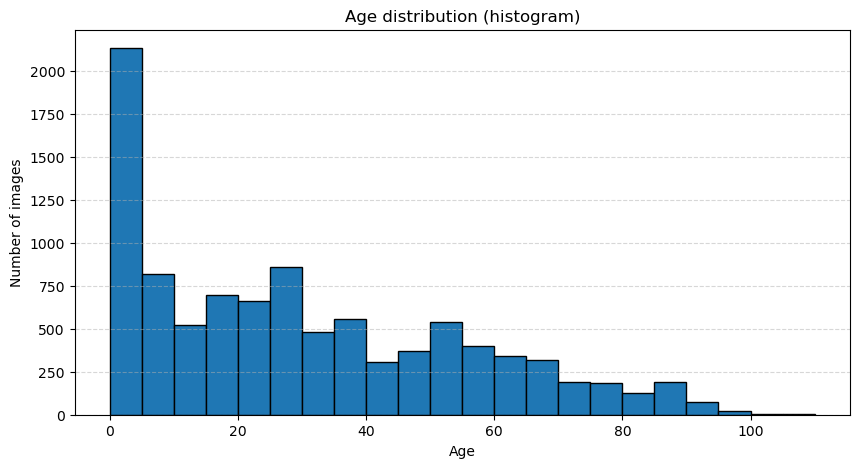

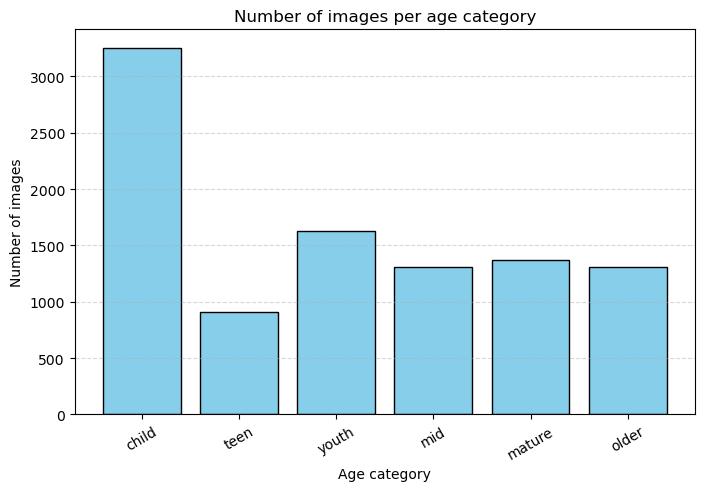

In [16]:
# Basic data exploration and visual checks for df_labels

import matplotlib.pyplot as plt

# (a) Count the number of images in each age category using simple loops
counts = {} # dictionary to hold counts per category (e.g {"child": 0, "teen": 0, ...})
# initialize counts for each known category
for c in categories:
    counts[c] = 0

# iterate over the dataframe column and increment counters
for cat_value in df_labels["age_category"]:
    if cat_value in counts:
        counts[cat_value] += 1
    else:
        # handle any unexpected category names by adding them
        counts[cat_value] = counts.get(cat_value, 0) + 1              # nice to have, I suppose

print("Counts per age_category:")
for c in counts:
    print(f"  {c:8s}: {counts[c]}")

# (b) Show min, max and average age using simple loops
age_values = df_labels["age"].tolist() # convert age column to a list of integers

# initialize min/max/sum using the first element to avoid using built-in min/max in one-liners
if len(age_values) > 0:
    min_age = age_values[0]
    max_age = age_values[0]
    sum_age = 0
    for a in age_values:
        if a < min_age:
            min_age = a
        if a > max_age:
            max_age = a
        sum_age += a
    avg_age = sum_age / len(age_values)
    print()
    print(f"Age statistics -> min: {min_age}, max: {max_age}, avg: {avg_age:.2f}")
else:
    print("No age values found in df_labels.")

# (c) Display a histogram of the age distribution
plt.figure(figsize=(10, 5)) # 10 inches wide, 5 inches tall
# choose bins
bins = list(range(0, 111, 5)) # bins from 0 to 110 with step of 5
plt.hist(age_values, bins=bins, edgecolor="black")
plt.title("Age distribution (histogram)")
plt.xlabel("Age")
plt.ylabel("Number of images")
plt.grid(axis="y", linestyle="--", alpha=0.5) # alpha=0.5 for semi-transparent grid lines
plt.show()

# (d) Display a bar chart of the number of images per age category
# Build a list of counts in the order of `categories`
counts_list = [] # expect around 6 categories
for c in categories:
    counts_list.append(counts.get(c, 0)) # get count for category, default to 0 if missing

plt.figure(figsize=(8, 5))
plt.bar(categories, counts_list, color="skyblue", edgecolor="black")
plt.title("Number of images per age category")
plt.xlabel("Age category")
plt.ylabel("Number of images")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [ ]:
# Summary of exploration
# ------------------------------------------------------

# The dataset has more images of children than any other group, while the teen group has the fewest. Because some age categories are more strongly represented than others, 
# the performance of the classification models might be affected, especially for underrepresented categories.

# The ages range from 1 to 110 years old, with an average age of about 29, so the model must learn from a very wide age range. Because there are more younger faces than older ones, 
# the model might perform better on younger age images.